In [92]:
import numpy as np
import pandas as pd
from sklearn import cross_validation
import sklearn
import statsmodels.stats.api as sms

In [71]:
data = pd.read_csv('challenger.txt', sep = '\t',header=0)

In [72]:
data.describe()

,Temperature,Incident
count,23.000000,23.000000
mean,20.860870,0.304348
std,3.919501,0.470472
min,11.700000,0.000000
25%,19.400000,0.000000
50%,21.100000,0.000000
75%,23.900000,1.000000
max,27.200000,1.000000


In [74]:
data.columns = ['Date', 'Temperature', 'Incident']

In [75]:
data

,Date,Temperature,Incident
0,Apr12.81,18.9,0
1,Nov12.81,21.1,1
2,Mar22.82,20.6,0
3,Nov11.82,20.0,0
4,Apr04.83,19.4,0
5,Jun18.83,22.2,0
6,Aug30.83,22.8,0
7,Nov28.83,21.1,0
8,Feb03.84,13.9,1
9,Apr06.84,17.2,1


In [81]:
noIncident = data.loc[data['Incident'] == 0]

In [82]:
yesIncident = data.loc[data['Incident'] == 1]

In [84]:
len(yesIncident)

7

In [85]:
len(noIncident)

16

In [118]:
def get_bootstrap_samples(dat, n_samples):
    indices = np.random.randint(0,len(dat), (n_samples , len(dat)))
    sampels = dat[indices]
    return sampels

In [152]:
def stat_intervals(stat, alpha):
    boundaries = np.percentile(stat, [100 * alpha / 2., 100*(1-alpha /2.)])
    return boundaries

In [125]:
a = np.array(yesIncident.Temperature)
b = np.array(noIncident.Temperature)

In [127]:
np.random.seed(0)

yes_mean_scores = map(np.mean, get_bootstrap_samples(a, 1000))
no_mean_scores = map(np.mean, get_bootstrap_samples(b, 1000))

In [148]:
# не то
stat_intervals(yes_mean_scores, 0.05)

array([14.61428571, 20.71607143])

In [189]:
q = map(lambda x: x[1] - x[0], zip(no_mean_scores, yes_mean_scores))

In [190]:
q

[-2.6339285714285694,
 -3.7633928571428577,
 -6.552678571428572,
 -3.6062499999999993,
 -2.695535714285711,
 -3.398214285714289,
 -5.985714285714284,
 -3.9330357142857117,
 -3.317857142857143,
 -6.599107142857141,
 -4.931249999999999,
 -4.425892857142859,
 -7.05892857142857,
 -7.691071428571426,
 -1.4312499999999986,
 -2.8642857142857103,
 -4.129464285714285,
 -2.55535714285714,
 -3.172321428571429,
 -4.25,
 -7.186607142857138,
 -7.684821428571427,
 -1.1821428571428605,
 -4.891071428571426,
 -2.6187499999999986,
 -3.3026785714285687,
 -1.945535714285711,
 -6.416964285714283,
 -2.7223214285714263,
 0.2624999999999993,
 -4.958035714285714,
 -3.5714285714285694,
 -2.4357142857142904,
 -3.131249999999998,
 -4.282142857142858,
 -5.351785714285711,
 -3.1205357142857153,
 -4.725892857142853,
 -3.709821428571427,
 -3.012500000000003,
 -5.188392857142857,
 -2.884821428571424,
 -5.8892857142857125,
 -2.28125,
 -3.3901785714285673,
 -3.1383928571428577,
 -6.138392857142858,
 -6.144642857142852,
 

In [191]:
stat_intervals(q, 0.05)

array([-8.06457589, -1.45040179])

28 января 1986 года космический шаттл "Челленджер" взорвался при взлёте. Семь астронавтов, находившихся на борту, погибли. В ходе расследования причин катастрофы основной версией была неполадка с резиновыми уплотнительными кольцами в соединении с ракетными ускорителями. Для 23 предшествовавших катастрофе полётов "Челленджера" известны температура воздуха и появление повреждений хотя бы у одного из уплотнительных колец.

С помощью бутстрепа постройте 95% доверительный интервал для разности средних температур воздуха при запусках, когда уплотнительные кольца повреждались, и запусках, когда повреждений не было. Чему равна его ближайшая к нулю граница? Округлите до четырёх знаков после запятой.

Чтобы получить в точности такой же доверительный интервал, как у нас:

установите random seed = 0 перед первым вызовом функции get_bootstrap_samples, один раз
сделайте по 1000 псевдовыборок из каждой выборки.

In [184]:
stat_intervals(yes_mean_scores, 0.05)

array([14.61428571, 20.71607143])

In [185]:
stat_intervals(no_mean_scores, 0.05)

array([21.14359375, 23.55046875])

На данных предыдущей задачи проверьте гипотезу об одинаковой средней температуре воздуха в дни, когда уплотнительный кольца повреждались, и дни, когда повреждений не было. Используйте перестановочный критерий и двустороннюю альтернативу. Чему равен достигаемый уровень значимости? Округлите до четырёх знаков после десятичной точки.

Чтобы получить такое же значение, как мы:

установите random seed = 0;
возьмите 10000 перестановок.

In [196]:
%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [222]:
def permutation_t_stat_ind(sample1, sample2):
    return np.mean(sample1) - np.mean(sample2)

In [223]:
def get_random_combinations(n1, n2, max_combinations):
    index = range(n1 + n2)
    indices = set([tuple(index)])
    for i in range(max_combinations - 1):
        np.random.shuffle(index)
        indices.add(tuple(index))
    return [(index[:n1], index[n1:]) for index in indices]

In [224]:
def permutation_zero_dist_ind(sample1, sample2, max_combinations = None):
    joined_sample = np.hstack((sample1, sample2))
    n1 = len(sample1)
    n = len(joined_sample)
    
    if max_combinations:
        indices = get_random_combinations(n1, len(sample2), max_combinations)
    else:
        indices = [(list(index), filter(lambda i: i not in index, range(n))) \
                    for index in itertools.combinations(range(n), n1)]
    
    distr = [joined_sample[list(i[0])].mean() - joined_sample[list(i[1])].mean() \
             for i in indices]
    return distr

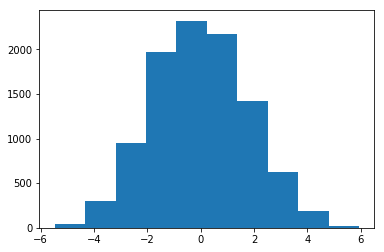

In [216]:
pylab.hist(permutation_zero_dist_ind(noIncident.Temperature, yesIncident.Temperature, max_combinations = 10000))
pylab.show()

In [225]:
def permutation_test(sample, mean, max_permutations = None, alternative = 'two-sided'):
    if alternative not in ('two-sided', 'less', 'greater'):
        raise ValueError("alternative not recognized\n"
                         "should be 'two-sided', 'less' or 'greater'")
    
    t_stat = permutation_t_stat_ind(sample, mean)
    
    zero_distr = permutation_zero_dist_ind(sample, mean, max_permutations)
    
    if alternative == 'two-sided':
        return sum([1. if abs(x) >= abs(t_stat) else 0. for x in zero_distr]) / len(zero_distr)
    
    if alternative == 'less':
        return sum([1. if x <= t_stat else 0. for x in zero_distr]) / len(zero_distr)

    if alternative == 'greater':
        return sum([1. if x >= t_stat else 0. for x in zero_distr]) / len(zero_distr)

In [226]:
print "p-value: %f" % permutation_test(noIncident.Temperature, yesIncident.Temperature, max_permutations = 10000)

p-value: 0.005700
